## Problem Statement

### Business Context

The healthcare industry is rapidly evolving, with professionals facing increasing challenges in managing vast volumes of medical data while delivering accurate and timely diagnoses. The need for quick access to comprehensive, reliable, and up-to-date medical knowledge is critical for improving patient outcomes and ensuring informed decision-making in a fast-paced environment.

Healthcare professionals often encounter information overload, struggling to sift through extensive research and data to create accurate diagnoses and treatment plans. This challenge is amplified by the need for efficiency, particularly in emergencies, where time-sensitive decisions are vital. Furthermore, access to trusted, current medical information from renowned manuals and research papers is essential for maintaining high standards of care.

To address these challenges, healthcare centers can focus on integrating systems that streamline access to medical knowledge, provide tools to support quick decision-making, and enhance efficiency. Leveraging centralized knowledge platforms and ensuring healthcare providers have continuous access to reliable resources can significantly improve patient care and operational effectiveness.

**Common Questions to Answer**

**1. Diagnostic Assistance**: "What are the common symptoms and treatments for pulmonary embolism?"

**2. Drug Information**: "Can you provide the trade names of medications used for treating hypertension?"

**3. Treatment Plans**: "What are the first-line options and alternatives for managing rheumatoid arthritis?"

**4. Specialty Knowledge**: "What are the diagnostic steps for suspected endocrine disorders?"

**5. Critical Care Protocols**: "What is the protocol for managing sepsis in a critical care unit?"

### Objective

As an AI specialist, your task is to develop a RAG-based AI solution using renowned medical manuals to address healthcare challenges. The objective is to **understand** issues like information overload, **apply** AI techniques to streamline decision-making, **analyze** its impact on diagnostics and patient outcomes, **evaluate** its potential to standardize care practices, and **create** a functional prototype demonstrating its feasibility and effectiveness.

### Data Description

The **Merck Manuals** are medical references published by the American pharmaceutical company Merck & Co., that cover a wide range of medical topics, including disorders, tests, diagnoses, and drugs. The manuals have been published since 1899, when Merck & Co. was still a subsidiary of the German company Merck.

The manual is provided as a PDF with over 4,000 pages divided into 23 sections.

## **Please read the instructions carefully before starting the project.**

This is a commented Python Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_____' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_____' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same. Any mathematical or computational details which are a graded part of the project can be included in the Appendix section of the presentation.

**Note**: If the free-tier GPU of Google Colab is not accessible (due to unavailability or exhaustion of daily limit or other reasons), the following steps can be taken:

1. Wait for 12-24 hours until the GPU is accessible again or the daily usage limits are reset.

2. Switch to a different Google account and resume working on the project from there.

3. Try using the CPU runtime:
    - To use the CPU runtime, click on *Runtime* => *Change runtime type* => *CPU* => *Save*
    - One can also click on the *Continue without GPU* option to switch to a CPU runtime (kindly refer to the snapshot below)
    - The instructions for running the code on the CPU are provided in the respective sections of the notebook.

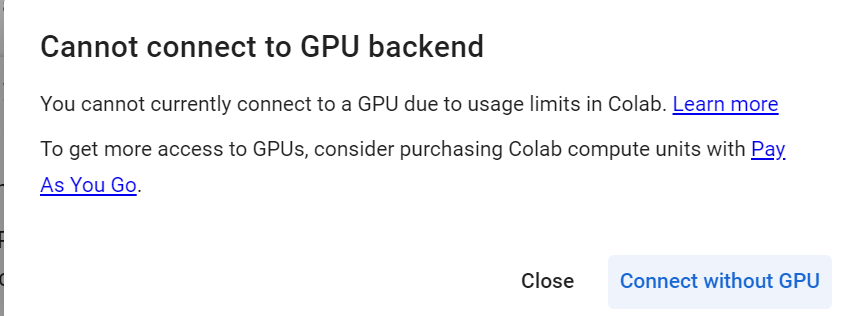

## Installing and Importing Necessary Libraries and Dependencies

In [1]:
# Installation for GPU llama-cpp-python
# uncomment and run the following code in case GPU is being used
!CMAKE_ARGS="-DLLAMA_CUBLAS=on" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

# Installation for CPU llama-cpp-python
# uncomment and run the following code in case GPU is not being used
# !CMAKE_ARGS="-DLLAMA_CUBLAS=off" FORCE_CMAKE=1 pip install llama-cpp-python==0.1.85 --force-reinstall --no-cache-dir -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 32.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 213.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 292.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.9/16.9 MB 305.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 217.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [1]:
# For installing the libraries & downloading models from HF Hub
!pip install huggingface_hub==0.23.2 pandas==1.5.3 tiktoken==0.6.0 pymupdf==1.25.1 langchain==0.1.1 langchain-community==0.0.13 chromadb==0.4.22 sentence-transformers==2.3.1 numpy==1.25.2 -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.3 MB

**Note**:
- After running the above cell, kindly restart the runtime (for Google Colab) or notebook kernel (for Jupyter Notebook), and run all cells sequentially from the next cell.
- On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in ***this notebook***.

In [1]:
#Libraries for downloading and loading the llm
from huggingface_hub import hf_hub_download
from llama_cpp import Llama

## Question Answering using LLM

### Downloading and Loading the model

In [2]:
model_name_or_path = "TheBloke/Mistral-7B-Instruct-v0.2-GGUF"
model_basename = "mistral-7b-instruct-v0.2.Q6_K.gguf"

In [3]:
model_path = hf_hub_download(
    repo_id=model_name_or_path,  # Complete the code to mention the repo id
    filename=model_basename      # Complete the code to mention the model name
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


mistral-7b-instruct-v0.2.Q6_K.gguf:   0%|          | 0.00/5.94G [00:00<?, ?B/s]

In [4]:
#uncomment the below snippet of code if the runtime is connected to GPU.
llm = Llama(
    model_path=model_path,
    n_ctx=2300,
    n_gpu_layers=38,
    n_batch=512
)

AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 1 | SSE3 = 1 | SSSE3 = 1 | VSX = 0 | 


In [ ]:
#uncomment the below snippet of code if the runtime is connected to CPU only.
#llm = Llama(
#    model_path=model_path,
#    n_ctx=1024,
#    n_cores=-2
#)

### Response

In [8]:
def response(query,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    model_output = llm(
      prompt=query,
      max_tokens=max_tokens,
      temperature=temperature,
      top_p=top_p,
      top_k=top_k
    )

    return model_output['choices'][0]['text']

In [9]:
response("What treatment options are available for managing hypertension?")

Llama.generate: prefix-match hit


'\n\nHypertension, or high blood pressure, is a common condition that can increase the risk of various health problems such as heart disease, stroke, and kidney damage. The good news is that there are several effective treatment options available to help manage hypertension and reduce the risk of complications. Here are some of the most commonly used treatments:\n\n1. Lifestyle modifications: Making lifestyle changes is often the first line of defense against hypertension. This may include eating a healthy diet rich in fruits, vegetables, whole grains, and lean proteins; limiting sodium intake; getting regular physical activity'

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [10]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
response(user_input)

Llama.generate: prefix-match hit


'\n\nSepsis is a life-threatening condition that can arise from an infection, and it requires prompt recognition and aggressive management in a critical care unit. The following are general steps for managing sepsis in a critical care unit:\n\n1. Early recognition: Recognize the signs and symptoms of sepsis early and initiate treatment as soon as possible. Sepsis can present with various clinical features, including fever or hypothermia, tachycardia or bradycardia, altered mental status, respiratory distress, and lactic acidosis.\n2. Resusc'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [11]:
user_input_2 = "What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to define the query #2
response(user_input_2) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain typically starts as a mild discomfort around the navel or in the lower right abdomen. It may then move to the right lower quadrant and become more severe over time. The pain is often described as sharp, crampy, or constant.\n2. Loss of appetite: People with'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [12]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to define the query #3
response(user_input_3) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, or eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications."

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [13]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to define the query #4
response(user_input_4) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments recommended for TBIs:\n\n1. Emergency care: The first priority is to ensure the person's airway is clear, they are breathing, and their heart is beating normally. In severe cases, emergency surgery may be required to remove hematomas or other obstructions.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [14]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to define the query #5
response(user_input_5) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or shallow breathing. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint, sl"

## Question Answering using LLM with Prompt Engineering

In [16]:
system_prompt = (
    "You are a knowledgeable and reliable medical assistant. "
    "Provide clear, concise, and accurate information, including relevant symptoms, diagnostic steps, and treatment guidelines. "
    "Do not provide speculative or unverified information. "
    "If unsure, state that the information is not available. "
    "Always use professional medical terminology and ensure your answer is factually correct."
)

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [17]:
user_input = system_prompt+"\n"+ "What is the protocol for managing sepsis in a critical care unit?"
response(user_input,max_tokens=260, temperature=0.0, top_p=0.9, top_k=40)

Llama.generate: prefix-match hit


'\nSepsis is a life-threatening condition caused by a dysregulated response to infection. In a critical care unit, managing sepsis involves the following steps:\n1. Early recognition and suspicion: Recognize sepsis early based on clinical signs such as fever or hypothermia, tachycardia or bradycardia, respiratory distress, altered mental status, and lactic acidosis. Suspect sepsis in any patient with suspected or confirmed infection who is at high risk for developing sepsis, such as those with chronic illnesses, immunosuppression, or invasive devices.\n2. Immediate resuscitation: Initiate fluid resuscitation to maintain adequate tissue perfusion and organ function. Administer oxygen to maintain adequate oxygenation.\n3. Antibiotic therapy: Start broad-spectrum antibiotics as soon as possible based on the suspected source of infection and local microbiology data.\n4. Source control: Identify and address the source of infection, such as removing an infected catheter or draining an absces

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [18]:
user_input2 = "What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
response(user_input2,max_tokens=260, temperature=0.0, top_p=0.9, top_k=40) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'\n\nAppendicitis is a medical condition characterized by inflammation of the appendix, a small tube-shaped organ located in the lower right side of the abdomen. The symptoms of appendicitis can vary from person to person, but some common signs include:\n\n1. Abdominal pain: The pain usually starts as a mild discomfort around the navel or in the lower right abdomen. It may then move to the right lower quadrant and become more severe over time. The pain is often described as sharp, crampy, or constant.\n2. Loss of appetite: People with appendicitis may lose their appetite due to abdominal discomfort or nausea.\n3. Nausea and vomiting: Vomiting is a common symptom of appendicitis, especially in the later stages of the condition.\n4. Fever: A fever of 100.4°F (38°C) or higher may be present in some cases of appendicitis.\n5. Diarrhea or constipation: Some people with appendicitis experience diarrhea, while others have constipation.\n6. Rebound tenderness: When the doctor presses on'

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [19]:
user_input3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
response(user_input3,max_tokens=260, temperature=0.0, top_p=0.9, top_k=40) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nSudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects the hair follicles. It can result in round or oval bald patches on the scalp, but it can also occur on other parts of the body such as the beard area, eyebrows, or eyelashes.\n\nThe exact cause of alopecia areata is not known, but it's believed to be related to a problem with the immune system. Some possible triggers for this condition include stress, genetics, viral infections, and certain medications.\n\nThere are several treatments that have been shown to be effective in addressing sudden patchy hair loss:\n\n1. Corticosteroids: These are anti-inflammatory drugs that can help reduce inflammation and suppress the immune system's attack on the hair follicles. They can be applied topically or taken orally, depending on the severity of the condition.\n2. Minoxidil: This is a medication that has been shown to promote hair growth in some people with alopecia areata. It works by increa

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [20]:
user_input4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
response(user_input4,max_tokens=260, temperature=0.0, top_p=0.9, top_k=40) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nA person who has sustained a physical injury to brain tissue, also known as a traumatic brain injury (TBI), may require various treatments depending on the severity and location of the injury. Here are some common treatments recommended for TBIs:\n\n1. Emergency care: The first priority is to ensure the person's airway is clear, they are breathing, and their heart is beating normally. In severe cases, emergency surgery may be required to remove hematomas or other obstructions.\n2. Medications: Depending on the symptoms, medications may be prescribed to manage conditions such as swelling, seizures, pain, or infections. For example, corticosteroids may be used to reduce brain swelling, and anticonvulsants may be given to prevent seizures.\n3. Rehabilitation: Rehabilitation is an essential part of the recovery process for TBI patients. Rehabilitation may include physical therapy to help with mobility and strength, occupational therapy to help with daily living skills, speech therapy 

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [21]:
user_input5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
response(user_input5,max_tokens=260, temperature=0.0, top_p=0.9, top_k=40) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"\n\nFirst and foremost, if you suspect that someone has fractured their leg while hiking, it's essential to ensure their safety and prevent further injury. Here are some necessary precautions:\n\n1. Keep the person calm and still: Encourage them to remain as still as possible to minimize pain and prevent worsening the injury.\n2. Assess the situation: Check for any signs of shock, such as pale skin, rapid heartbeat, or shallow breathing. If you notice these symptoms, seek medical help immediately.\n3. Immobilize the leg: Use a splint, sling, or other available materials to immobilize the leg and prevent movement. Be sure not to apply too much pressure on the injury site.\n4. Provide pain relief: Offer over-the-counter pain medication, such as acetaminophen or ibuprofen, to help manage pain.\n5. Seek medical attention: If the fracture is severe or if you suspect that there may be other injuries, seek medical help as soon as possible.\n\nOnce you've ensured the person's safety and stabi

## Data Preparation for RAG

In [22]:
#Libraries for processing dataframes,text
import json,os
import tiktoken
import pandas as pd

#Libraries for Loading Data, Chunking, Embedding, and Vector Databases
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import PyMuPDFLoader
from langchain_community.embeddings.sentence_transformer import SentenceTransformerEmbeddings
from langchain_community.vectorstores import Chroma

### Loading the Data

In [23]:
# uncomment and run the below code snippets if the dataset is present in the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
manual_pdf_path = "/content/drive/My Drive/medical_diagnosis_manual.pdf" #Complete the code to define the file name

In [25]:
pdf_loader = PyMuPDFLoader(manual_pdf_path)

In [26]:
manual = pdf_loader.load()

### Data Overview

#### Checking the first 5 pages

In [27]:
for i in range(5):
    print(f"Page Number : {i+1}",end="\n")
    print(manual[i].page_content,end="\n")

Page Number : 1
nungliansume@gmail.com
IP3CU9Q5ZS
ant for personal use by nungliansume@g
shing the contents in part or full is liable 

Page Number : 2
nungliansume@gmail.com
IP3CU9Q5ZS
This file is meant for personal use by nungliansume@gmail.com only.
Sharing or publishing the contents in part or full is liable for legal action.

Page Number : 3
Table of Contents
1
Front    ................................................................................................................................................................................................................
1
Cover    .......................................................................................................................................................................................................
2
Front Matter    .......................................................................................................................................................................................

#### Checking the number of pages

In [28]:
len(manual)

4114

### Data Chunking

In [29]:
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(
    encoding_name='cl100k_base',
    chunk_size=500, #Complete the code to define the chunk size
    chunk_overlap=100 #Complete the code to define the chunk overlap
)

In [30]:
document_chunks = pdf_loader.load_and_split(text_splitter)

In [31]:
len(document_chunks)

9344

In [32]:
document_chunks[0].page_content

'nungliansume@gmail.com\nIP3CU9Q5ZS\nant for personal use by nungliansume@g\nshing the contents in part or full is liable'

In [33]:
document_chunks[2].page_content

'Table of Contents\n1\nFront    ................................................................................................................................................................................................................\n1\nCover    .......................................................................................................................................................................................................\n2\nFront Matter    ...........................................................................................................................................................................................\n53\n1 - Nutritional Disorders    ...............................................................................................................................................................\n53\nChapter 1. Nutrition: General Considerations    ...........................................................................................

In [34]:
document_chunks[3].page_content

"246\nChapter 21. Anorectal Disorders    ............................................................................................................................................\n254\nChapter 22. Tumors of the GI Tract    ......................................................................................................................................\n275\n3 - Hepatic & Biliary Disorders    ............................................................................................................................................\n275\nChapter 23. Approach to the Patient With Liver Disease    ...........................................................................................\n294\nChapter 24. Testing for Hepatic & Biliary Disorders    ......................................................................................................\n305\nChapter 25. Drugs & the Liver    ..................................................................................................

As expected, there are some overlaps

### Embedding

In [35]:
embedding_model = SentenceTransformerEmbeddings(model_name="all-MiniLM-L6-v2") #Complete the code to define the model name

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [36]:
embedding_1 = embedding_model.embed_query(document_chunks[0].page_content)
embedding_2 = embedding_model.embed_query(document_chunks[1].page_content)

In [37]:
print("Dimension of the embedding vector ",len(embedding_1))
len(embedding_1)==len(embedding_2)

Dimension of the embedding vector  384


True

In [38]:
embedding_1,embedding_2

([-0.10990890115499496,
  0.051072411239147186,
  -0.002579369815066457,
  -0.04994732141494751,
  0.050830502063035965,
  -0.01123926229774952,
  0.08339501917362213,
  0.03242722153663635,
  -0.008385212160646915,
  -0.018101340159773827,
  0.059050317853689194,
  -0.002893049968406558,
  -0.020258257165551186,
  -0.053681302815675735,
  -0.05889919400215149,
  -0.028704065829515457,
  -0.02082609012722969,
  0.018615972250699997,
  -0.03956649452447891,
  -0.01578507572412491,
  -0.006003991235047579,
  -0.008252735249698162,
  0.023944182321429253,
  -0.04355208948254585,
  -0.0438612699508667,
  0.0678742304444313,
  -0.03538385033607483,
  0.027238504961133003,
  0.00556575320661068,
  -0.08118671178817749,
  0.047235339879989624,
  0.05471981689333916,
  0.07931290566921234,
  -0.010326354764401913,
  0.018154701218008995,
  0.02151990309357643,
  -0.08158927410840988,
  -0.04572327062487602,
  0.03301062434911728,
  -0.025607792660593987,
  0.007518504746258259,
  -0.0433513075

### Vector Database

In [39]:
out_dir = 'medical_db'

if not os.path.exists(out_dir):
  os.makedirs(out_dir)

In [40]:
vectorstore = Chroma.from_documents(
    document_chunks, #Complete the code to pass the document chunks
    embedding_model, #Complete the code to pass the embedding model
    persist_directory=out_dir
)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [41]:
vectorstore = Chroma(persist_directory=out_dir,embedding_function=embedding_model)

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientStartEvent: capture() takes 1 positional argument but 3 were given
ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event ClientCreateCollectionEvent: capture() takes 1 positional argument but 3 were given


In [42]:
vectorstore.embeddings

HuggingFaceEmbeddings(client=SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False, 'pooling_mode_weightedmean_tokens': False, 'pooling_mode_lasttoken': False})
  (2): Normalize()
), model_name='all-MiniLM-L6-v2', cache_folder=None, model_kwargs={}, encode_kwargs={}, multi_process=False)

In [43]:
vectorstore.similarity_search("What are the common symptoms and treatments for pulmonary embolism?",k=3) #Complete the code to pass a query and an appropriate k value

ERROR:chromadb.telemetry.product.posthog:Failed to send telemetry event CollectionQueryEvent: capture() takes 1 positional argument but 3 were given


[Document(page_content='Chapter 194. Pulmonary Embolism\nIntroduction\nPulmonary embolism (PE) is the occlusion of ≥ 1 pulmonary arteries by thrombi that originate\nelsewhere, typically in the large veins of the lower extremities or pelvis. Risk factors are\nconditions that impair venous return, conditions that cause endothelial injury or dysfunction,\nand underlying hypercoagulable states. Symptoms are nonspecific and include dyspnea,\npleuritic chest pain, cough, and, in severe cases, syncope or cardiorespiratory arrest. Signs are\nalso nonspecific and may include tachypnea, tachycardia, hypotension, and a loud pulmonic\ncomponent of the 2nd heart sound. Diagnosis is based on a CT angiogram, ventilation/perfusion\nscan, or a pulmonary arteriogram. Treatment is with anticoagulants and, sometimes, clot\ndissolution with thrombolytics or surgical removal. Preventive measures include anticoagulants\nand sometimes insertion of an inferior vena caval filter.\nPE affects an estimated 117 pe

### Retriever

In [44]:
retriever = vectorstore.as_retriever(
    search_type='similarity',
    search_kwargs={'k': 3} #Complete the code to pass an appropriate k value
)

In [45]:
rel_docs = retriever.get_relevant_documents("What are the common symptoms and treatments for pulmonary embolism?") #Complete the code to pass the query
rel_docs

[Document(page_content='Chapter 194. Pulmonary Embolism\nIntroduction\nPulmonary embolism (PE) is the occlusion of ≥ 1 pulmonary arteries by thrombi that originate\nelsewhere, typically in the large veins of the lower extremities or pelvis. Risk factors are\nconditions that impair venous return, conditions that cause endothelial injury or dysfunction,\nand underlying hypercoagulable states. Symptoms are nonspecific and include dyspnea,\npleuritic chest pain, cough, and, in severe cases, syncope or cardiorespiratory arrest. Signs are\nalso nonspecific and may include tachypnea, tachycardia, hypotension, and a loud pulmonic\ncomponent of the 2nd heart sound. Diagnosis is based on a CT angiogram, ventilation/perfusion\nscan, or a pulmonary arteriogram. Treatment is with anticoagulants and, sometimes, clot\ndissolution with thrombolytics or surgical removal. Preventive measures include anticoagulants\nand sometimes insertion of an inferior vena caval filter.\nPE affects an estimated 117 pe

In [46]:
model_output = llm(
      "What are the common symptoms and treatments for pulmonary embolism?", #Complete the code to pass the query
      max_tokens=256, #Complete the code to pass the maximum number of tokens
      temperature=0, #Complete the code to pass the temperature
    )

Llama.generate: prefix-match hit


In [47]:
model_output['choices'][0]['text']

'\n\nPulmonary embolism is a serious condition that occurs when a blood clot or other foreign substance travels to the lungs and blocks one or more of the arteries supplying blood to the lungs. This can lead to decreased oxygen supply to the body, which can result in various symptoms. Some common symptoms of pulmonary embolism include:\n\n1. Shortness of breath: This is often the most prominent symptom of pulmonary embolism. Patients may feel like they are unable to get enough air or that they are breathing too hard.\n2. Chest pain: Pulmonary embolism can cause sharp, stabbing chest pain, especially when taking deep breaths or coughing. The pain may be worse when lying down or bending over.\n3. Rapid heart rate: Patients with pulmonary embolism may have a fast heartbeat, which can be a sign of the body trying to compensate for decreased oxygen levels.\n4. Coughing up blood: In some cases, patients may cough up blood or bloody mucus. This is a more serious symptom and requires immediate

The above response is somewhat generic and is solely based on the data the model was trained on, rather than the medical manual.  

Let's now provide our own context.

### System and User Prompt Template

Prompts guide the model to generate accurate responses. Here, we define two parts:

    1. The system message describing the assistant's role.
    2. A user message template including context and the question.

In [48]:
qna_system_message = (
    "You are a knowledgeable and reliable medical assistant. "
    "You answer questions using trusted medical references such as The Merck Manual. "
    "Provide clear, concise, and factually correct information. "
    "Use professional medical terminology, and if the answer is not in the provided context, say you do not know."
)


In [49]:
qna_user_message_template = (
    "Context:\n{context}\n\n"
    "Question: {question}\n\n"
    "Answer:"
)

### Response Function

In [50]:
def generate_rag_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=k)
    context_list = [d.page_content for d in relevant_document_chunks]

    # Combine document chunks into a single context
    context_for_query = ". ".join(context_list)

    user_message = qna_user_message_template.replace('{context}', context_for_query)
    user_message = user_message.replace('{question}', user_input)

    prompt = qna_system_message + '\n' + user_message

    # Generate the response
    try:
        response = llm(
                  prompt=prompt,
                  max_tokens=max_tokens,
                  temperature=temperature,
                  top_p=top_p,
                  top_k=top_k
                  )

        # Extract and print the model's response
        response = response['choices'][0]['text'].strip()
    except Exception as e:
        response = f'Sorry, I encountered the following error: \n {e}'

    return response

## Question Answering using RAG

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [52]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,top_k=20)

Llama.generate: prefix-match hit


'The management of sepsis in a critical care unit involves several steps. If bacteremia, sepsis, or septic shock is suspected, cultures are obtained of blood and any other appropriate specimens. Empiric antibiotics are given after appropriate cultures are obtained, and early treatment appears to improve survival. Antibiotic therapy should be adjusted according to the results of culture and susceptibility testing, surgical drainage of abscesses may be necessary, and internal devices that are suspected sources of bacteria should be removed. Supportive care includes fluids, antipyretics, analgesics,'

### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [53]:
user_input_2 = "What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"The common symptoms of appendicitis include epigastric or periumbilical pain followed by brief nausea, vomiting, and anorexia. After a few hours, the pain shifts to the right lower quadrant. Pain increases with cough and motion. Classic signs are right lower quadrant direct and rebound tenderness located at McBurney's point, Rovsing sign, psoas sign, or obturator sign. Low-grade fever is common, but these classic findings appear in less than 50% of patients. Many variations of symptoms and signs occur, especially among inf"

### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [54]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_3,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


'Sudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects people with no obvious skin or systemic disorder. The most frequently affected areas are the scalp and beard. In severe cases, all body hair may be lost (alopecia universalis). Alopecia areata is thought to be an autoimmune disorder affecting genetically susceptible individuals exposed to unclear environmental triggers.\n\nEffective treatments for alopecia areata include:\n1. Topical corticosteroids: These medications can stimulate hair growth and are'

### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [55]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_4,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"For a person with a brain injury resulting in temporary or permanent impairment of brain function, early intervention by rehabilitation specialists is crucial for maximal functional recovery. Rehabilitation therapy varies depending on the patient's abnormalities and may include prevention of secondary disabilities such as pressure ulcers, joint contractures, and pneumonia. In case of severe cognitive dysfunction, extensive cognitive therapy is often begun immediately after injury and continued for months or years. Physical and occupational therapy can help improve functioning but is more often used to make the environment safer and provide devices that help patients circumvent primary deficits. There is"

### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [56]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_5,top_k=20) #Complete the code to pass the user input

Llama.generate: prefix-match hit


"A fractured leg requires prompt medical attention. The first step is to ensure the person's safety and prevent further injury by immobilizing the affected limb using a splint or a thigh sleeve with ice and compression. Pain management through NSAIDs and analgesics may be necessary, and crutches might be required for initial mobility. Depending on the severity of the fracture, treatment could involve surgical intervention such as reduction or immobilization with various hardware like pins, screws, plates, or external fixators. For soft-tissue injuries, RICE (rest, ice, compression, elev"

### Fine-tuning

#### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [57]:
user_input = "What is the protocol for managing sepsis in a critical care unit?"
generate_rag_response(user_input,max_tokens=260, temperature=0.3, top_p=0.92, top_k=50)

Llama.generate: prefix-match hit


'The management of sepsis in a critical care unit involves several steps. If bacteremia, sepsis, or septic shock is suspected, cultures are obtained of blood and any other appropriate specimens. Empiric antibiotics are given after appropriate cultures are obtained, and early treatment appears to improve survival. Continuing therapy involves adjusting antibiotics according to the results of culture and susceptibility testing, surgically draining any abscesses, and removing any internal devices that are the suspected source of bacteria. Supportive care includes fluids, antipyretics, analgesics, and oxygen for patients with hypoxemia. The choice of antibiotics is based on likely pathogens and severity of illness, and guidelines should be adapted to local susceptibility patterns, drug formularies, and individual patient circumstances. None of the guidelines provide recommendations for treatment of viral pneumonia. Ribavirin and RSV Ig have been used for RSV bronchiolitis in children but th

#### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [58]:
user_input_2 = "What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?" #Complete the code to pass the query #2
generate_rag_response(user_input_2,max_tokens=260, temperature=0.3, top_p=0.92, top_k=50) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


"The common symptoms of appendicitis include epigastric or periumbilical pain followed by brief nausea, vomiting, and anorexia, which is then followed by right lower quadrant pain that increases with cough and motion. Classic signs include direct and rebound tenderness at McBurney's point, Rovsing sign, psoas sign, or obturator sign, and a low-grade fever. However, these classic findings appear in less than 50% of patients, and many variations of symptoms and signs occur. Appendicitis cannot be cured via medicine alone, and the standard treatment is surgical removal of the appendix through open or laparoscopic appendectomy. Treatment delay increases the likelihood of perforation and subsequent complications, so a negative appendectomy rate of 15% is considered acceptable. If surgery is impossible, antibiotics can improve the survival rate but are not curative. When a large inflammatory mass is found involving the appendix, terminal ileum, and cecum, resection of the entire mass and ile

#### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [59]:
user_input_3 = "What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?" #Complete the code to pass the query #3
generate_rag_response(user_input_3,max_tokens=260, temperature=0.3, top_p=0.92, top_k=50) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'Sudden patchy hair loss, also known as alopecia areata, is a common autoimmune disorder that affects people with no obvious skin or systemic disorder. The most frequently affected areas are the scalp and beard. In severe cases, all body hair may be lost (alopecia universalis). Alopecia areata is thought to be an autoimmune disorder affecting genetically susceptible individuals exposed to unclear environmental triggers.\n\nEffective treatments for alopecia areata include:\n1. Topical corticosteroids: They help stimulate hair growth and reduce inflammation.\n2. Intralesional corticosteroid injections: These injections can be more effective than topical applications, especially for larger patches of hair loss.\n3. Minoxidil (Rogaine): A topical medication that can stimulate hair growth and slow down hair loss.\n4. Immunotherapy: Diphencyprone or squaric acid dibutylester can be used to stimulate an immune response, leading to hair regrowth.\n5. Systemic corticosteroids: In severe cases, 

#### Query 4:  What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [60]:
user_input_4 = "What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?" #Complete the code to pass the query #4
generate_rag_response(user_input_4,max_tokens=260, temperature=0.3, top_p=0.92, top_k=50) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


'The treatment for a person with a brain injury involves a multidisciplinary approach aimed at maximizing functional recovery and preventing secondary disabilities. Early intervention by rehabilitation specialists is crucial for optimal outcomes. Rehabilitation may include prevention of pressure ulcers, joint contractures, and pneumonia, as well as cognitive therapy for patients with severe cognitive dysfunction. Physical and occupational therapy can help improve functioning and make the environment safer. There is no specific medical treatment to slow the symptomatic progression of brain injury or dementia. Supportive care includes preventing systemic complications due to immobilization, providing good nutrition, and preventing pressure ulcers. The prognosis for recovery depends on the severity and cause of the brain injury, with younger patients typically recovering more motor function than older patients but not more cognition, behavior, or speech. Recovery from a vegetative state i

#### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [61]:
user_input_5 = "What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?" #Complete the code to pass the query #5
generate_rag_response(user_input_5,max_tokens=260, temperature=0.3, top_p=0.92, top_k=50) #Complete the code to pass the user input along with the parameters

Llama.generate: prefix-match hit


"A fractured leg requires prompt medical attention. In the initial phase, life-threatening injuries should be addressed, followed by splinting or immobilization to prevent further damage. Rest, ice, compression, and elevation (RICE) are essential components of treatment for soft tissue injuries associated with a fracture. NSAIDs and analgesics may be prescribed as necessary, and crutches may be required initially if walking is painful. Depending on the severity of the injury, definitive treatment such as reduction or surgery may be necessary. For hip fractures, rehabilitation should begin as soon as possible to prevent atrophy and increase strength. Initially, only isometric exercises are permitted, and gradual mobilization leads to full ambulation. Daily exercises to strengthen trunk muscles and quadriceps are essential, and heavy lifting or strenuous activities should be avoided during recovery. It's important for the person to follow their healthcare provider's instructions carefull

## Output Evaluation

Let us now use the LLM-as-a-judge method to check the quality of the RAG system on two parameters - retrieval and generation.

- We are using the same Mistral model for evaluation, so basically here the llm is rating itself on how well he has performed in the task.

In [62]:
groundedness_rater_system_message = (
    "You are a strict medical QA evaluator. Assess whether the ANSWER is grounded only in the provided CONTEXT. "
    "Do not use outside knowledge. Rate on a 1–5 scale (5=fully supported; 4=mostly; 3=partially; 2=minimally; 1=unsupported/contradictory). "
    "Provide a brief justification and then output a final line exactly as: Score: <1-5>."
)


In [63]:
relevance_rater_system_message = (
    "You are a strict medical retrieval evaluator. Given a QUESTION and CONTEXT (retrieved passages), rate how relevant the CONTEXT is to answering the QUESTION. "
    "Evaluate retrieval only (not the quality of any generated answer). "
    "Use a 1–5 scale (5=highly specific and directly relevant; 4=mostly relevant with minor irrelevancies; 3=partially relevant; 2=slightly relevant; 1=irrelevant). "
    "Provide a brief justification and then output a final line exactly as: Score: <1-5>."
)


In [64]:
user_message_template = """
###Question
{question}

###Context
{context}

###Answer
{answer}
"""

In [65]:
def generate_ground_relevance_response(user_input,k=3,max_tokens=128,temperature=0,top_p=0.95,top_k=50):
    global qna_system_message,qna_user_message_template
    # Retrieve relevant document chunks
    relevant_document_chunks = retriever.get_relevant_documents(query=user_input,k=3)
    context_list = [d.page_content for d in relevant_document_chunks]
    context_for_query = ". ".join(context_list)

    # Combine user_prompt and system_message to create the prompt
    prompt = f"""[INST]{qna_system_message}\n
                {'user'}: {qna_user_message_template.format(context=context_for_query, question=user_input)}
                [/INST]"""

    response = llm(
            prompt=prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    answer =  response["choices"][0]["text"]

    # Combine user_prompt and system_message to create the prompt
    groundedness_prompt = f"""[INST]{groundedness_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    # Combine user_prompt and system_message to create the prompt
    relevance_prompt = f"""[INST]{relevance_rater_system_message}\n
                {'user'}: {user_message_template.format(context=context_for_query, question=user_input, answer=answer)}
                [/INST]"""

    response_1 = llm(
            prompt=groundedness_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    response_2 = llm(
            prompt=relevance_prompt,
            max_tokens=max_tokens,
            temperature=temperature,
            top_p=top_p,
            top_k=top_k,
            stop=['INST'],
            echo=False
            )

    return response_1['choices'][0]['text'],response_2['choices'][0]['text']

### Query 1: What is the protocol for managing sepsis in a critical care unit?

In [66]:
ground,rel = generate_ground_relevance_response(user_input="What is the protocol for managing sepsis in a critical care unit?",max_tokens=370)

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Score: 5. The context provides a detailed description of the management of critically ill patients in an ICU setting, including monitoring, diagnostic tests, and treatment options for various conditions, such as sepsis or septic shock. The answer closely follows the information provided in the context, outlining the steps to be taken when managing a suspected case of sepsis or septic shock in a critical care unit.

 Score: 5. The context provides a detailed description of the management of critically ill patients in an ICU setting, with specific mention of sepsis and septic shock, including diagnosis, treatment steps, and monitoring.


### Query 2: What are the common symptoms for appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?

In [67]:
ground,rel = generate_ground_relevance_response(user_input="What are the common symptoms of appendicitis, and can it be cured via medicine? If not, what surgical procedure should be followed to treat it?",max_tokens=370) #Complete the code to pass the query #2 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Score: 5. The answer fully supports the context provided, as it accurately summarizes the common symptoms of appendicitis and emphasizes that surgical removal is the only cure for the condition. The answer also mentions the role of antibiotics and IV fluids in the treatment process, which aligns with the information given in the context.

 Score: 5. The context provides detailed information about the symptoms of appendicitis and its diagnosis, as well as the necessary treatment which is surgical removal. It directly answers the question about the common symptoms and the fact that appendicitis cannot be cured via medicine alone.


### Query 3: What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?

In [68]:
ground,rel = generate_ground_relevance_response(user_input="What are the effective treatments or solutions for addressing sudden patchy hair loss, commonly seen as localized bald spots on the scalp, and what could be the possible causes behind it?",max_tokens=370) #Complete the code to pass the query #3 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Score: 5. The context provides detailed information about alopecia, including the definition, causes, and treatments for both scarring and non-scarring forms. The answer is fully supported by the context as it accurately identifies alopecia areata as a common form of sudden patchy hair loss and lists effective treatments, which align with those mentioned in the context.

 Score: 5. The context directly and specifically addresses the question by providing information about alopecia areata, which is a type of sudden patchy hair loss, and discussing various treatments for this condition.


### Query 4: What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?

In [69]:
ground,rel = generate_ground_relevance_response(user_input="What treatments are recommended for a person who has sustained a physical injury to brain tissue, resulting in temporary or permanent impairment of brain function?",max_tokens=370) #Complete the code to pass the query #4 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Score: 5. The context provides detailed information about the recommended treatments for a person with a physical injury to brain tissue, including early intervention by rehabilitation specialists, physical and occupational therapy, and supportive care. The context also discusses the importance of preventing secondary disabilities and systemic complications, as well as the poor prognosis for most patients in a vegetative state. Therefore, the answer is fully supported by the context.

 Score: 4. The context discusses various types of injuries, including brain injury, and mentions rehabilitation and treatments such as physical therapy and occupational therapy for brain injury patients. However, it also includes information on other types of injuries and irrelevant details, so it is not a highly specific match to the question.


### Query 5: What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?

In [70]:
ground,rel = generate_ground_relevance_response(user_input="What are the necessary precautions and treatment steps for a person who has fractured their leg during a hiking trip, and what should be considered for their care and recovery?",max_tokens=370) #Complete the code to pass the query #5 along with parameters if needed

print(ground,end="\n\n")
print(rel)

Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


 Score: 5. The answer fully supports the context by summarizing the necessary precautions and treatment steps for a person who has fractured their leg, including immobilization, pain management, and RICE therapy, which are all mentioned in the context.

 Score: 4. The context provides relevant information about the treatment steps for a fractured leg, including rest, ice, compression, elevation (RICE), immobilization with splinting or casting, pain management, and potential need for surgical intervention. However, there are some irrelevant passages in the context regarding meniscal tears, cartilaginous injuries, arterial injuries, nerve injuries, hip surgery rehabilitation, and a lower-limb prosthesis. These passages do not directly relate to the question about precautions and treatment steps for a person who has fractured their leg during a hiking trip.


## Actionable Insights and Business Recommendations


*   
*  
*



<font size=6 color='blue'>Power Ahead</font>
___